In [1]:
import pandas as pd 
import numpy as np 
import re  
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
info_content = pd.read_csv('C:/Users/AdminCOOP/desktop/BT4103/dataset/info_content.csv')
info_userdata = pd.read_csv('C:/Users/AdminCOOP/desktop/BT4103/dataset/info_UserData.csv')
log_problem = pd.read_csv('C:/Users/AdminCOOP/desktop/BT4103/dataset/Log_Problem.csv')

# COMMON FUNCTIONS/DATASETS

## Finding students' accuracy

In [3]:
def get_student_accuracy(student_id, exercise_id=None):
    '''
    helper function to return the % of questions answered correctly by student 
    if exercise_id is specified, only considers given exercise. 
    else will return agg accuracy across all exercises 
    '''
    student_mask = log_problem['uuid']==student_id
    student_data = log_problem[student_mask]
    
    if exercise_id:
        exercise_mask = student_data['ucid']==exercise_id
        student_data = student_data[exercise_mask]
    
    # accuracy = # questions answered correctly / # questions attempted
    student_accuracy = sum(student_data['is_correct']) / len(student_data['is_correct'])
    return student_accuracy

# test case
get_student_accuracy(log_problem['uuid'][0])

0.8421052631578947

In [4]:
pivot_correct = log_problem.pivot_table(values='is_correct', index='uuid', aggfunc='sum')
pivot_attempted = log_problem.pivot_table(values='is_correct', index='uuid', aggfunc='count')

student_accuracies = pivot_correct / pivot_attempted
student_accuracies

,is_correct
uuid,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,1.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,0.103448
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,0.700000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,0.560976
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,0.883871
...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,0.884615
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,0.666667
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.552743


In [18]:
pivot_exercises = log_problem.pivot_table(index='uuid', values='ucid', aggfunc=pd.Series.nunique)
pivot_problems = log_problem.pivot_table(index='uuid', values='upid', aggfunc=pd.Series.nunique)

In [34]:
pivot_time = log_problem.pivot_table(values='total_sec_taken', index='uuid', aggfunc='sum')
avg_time_taken = pivot_problems.merge(pivot_time, how="inner", on="uuid")
avg_time_taken['avg_time_taken'] = avg_time_taken['total_sec_taken']/avg_time_taken['upid']
avg_time_taken = avg_time_taken.drop(['total_sec_taken', 'upid'], axis=1)

# How do students' behaviours affect accuracy

## First hypothesis: Students who attempt more exercises tend to have higher accuracy

In [3]:
log_problem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [16]:
## Group dataset based on students, find the number of questions that each of them attempt and find their average accuracy
new_df = pivot_exercises.merge(student_accuracies,how="inner",on="uuid")
new_df = new_df.rename(columns={"ucid": "no_of_exercises", "is_correct": "accuracy_rate"})

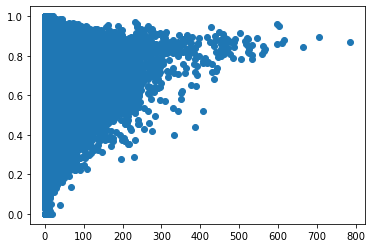

In [40]:
plt.scatter(new_df['no_of_exercises'], new_df['accuracy_rate'], marker='o');

## Second hypothesis: Students who attempt more problems tend to have higher accuracy

In [19]:
new_df = new_df.merge(pivot_problems, how="inner", on="uuid")
new_df = new_df.rename(columns={"upid": "no_of_problems"})
new_df                                

,no_of_exercises,accuracy_rate,no_of_problems
uuid,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,1,1.000000,5
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,1,0.103448,21
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1,0.700000,10
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,6,0.560976,41
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,25,0.883871,153
...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,5,0.884615,26
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,4,0.666667,27
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,28,0.552743,230


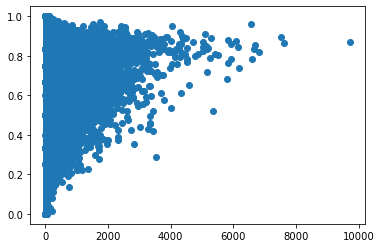

In [39]:
plt.scatter(new_df['no_of_problems'], new_df['accuracy_rate'], marker='o');

## Third Hypothesis: Students who spends less time on average on each question has a lower accuracy rate

In [35]:
new_df = new_df.merge(avg_time_taken, how="inner", on="uuid")

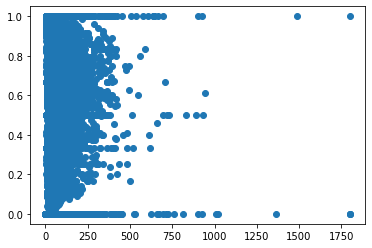

In [37]:
plt.scatter(new_df['avg_time_taken'], new_df['accuracy_rate'], marker='o');

# How do Students' demographics affect accuracy

In [41]:
info_userdata.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [44]:
new_df_w_userdata = new_df.merge(info_userdata, how="inner", on="uuid")
new_df_w_userdata

,uuid,no_of_exercises,accuracy_rate,no_of_problems,avg_time_taken,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,1,1.000000,5,60.400000,NaN,16725,1,2018-12-17,7,tn,1,False,0,1,0
1,++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,1,0.103448,21,20.380952,NaN,1200,3,2019-05-22,7,chc,1,False,0,1,0
2,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,1,0.700000,10,89.800000,NaN,9533,0,2018-08-31,5,ty,1,False,0,1,0
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,6,0.560976,41,37.804878,NaN,8027,0,2018-11-22,6,ty,1,False,0,1,0
4,++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,25,0.883871,153,32.307190,unspecified,41831,2,2019-04-13,7,tn,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,5,0.884615,26,130.307692,NaN,7500,0,2018-10-23,9,tp,1,False,0,1,0
72754,zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,4,0.666667,27,87.333333,NaN,3750,0,2019-01-26,4,ilc,0,False,0,0,0
72755,zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,28,0.552743,230,48.334783,male,33370,4,2018-09-14,3,ilc,3,False,0,4,0
72756,zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=,3,0.956522,23,10.217391,unspecified,7995,1,2018-10-18,5,ty,1,False,0,0,0


In [47]:
new_df_w_userdata.describe()

,no_of_exercises,accuracy_rate,no_of_problems,avg_time_taken,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,72758.000000,72758.000000,72758.000000,72758.000000,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,23.778691,0.711953,189.464994,50.397025,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442
std,41.192548,0.211702,374.213832,43.389896,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060
min,1.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.612430,16.000000,26.691176,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.751604,55.000000,41.596447,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,26.000000,0.855729,191.000000,61.891623,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,785.000000,1.000000,9721.000000,1800.000000,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000


## Hypothesis 1: Students benefit from peer learning/classroom learning
1. has_teacher_cnt = number of teachers 
2. has_student_cnt = number of students user has 
3. belongs_to_class = number of classes the student belongs to 
4. has_class_cnt = number of classes this user has created

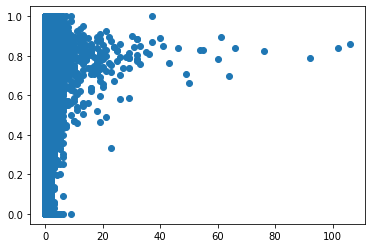

In [46]:
plt.scatter(new_df_w_userdata['has_teacher_cnt'], new_df_w_userdata['accuracy_rate'], marker='o');

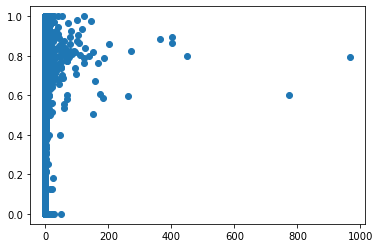

In [48]:
plt.scatter(new_df_w_userdata['has_student_cnt'], new_df_w_userdata['accuracy_rate'], marker='o');

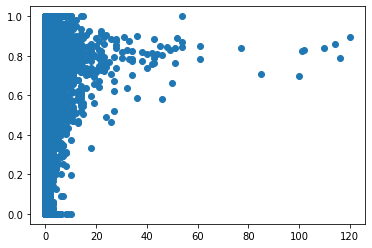

In [49]:
plt.scatter(new_df_w_userdata['belongs_to_class_cnt'], new_df_w_userdata['accuracy_rate'], marker='o');

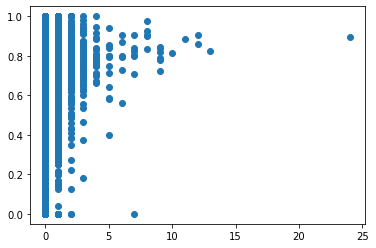

In [50]:
plt.scatter(new_df_w_userdata['has_class_cnt'], new_df_w_userdata['accuracy_rate'], marker='o');

# How do questions affect students' accuracies?

In [52]:
info_content.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
